In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('ukraineairspace2.csv')

In [4]:
df.columns=['ICAO','ATG','OriginCountry','TimeAtPosition','TimeLastContact','Longitude','Latitude','Altitude',
            'Grounded','Velocity','Heading','VerticalRate','Sensors','GeoAltitude','SQUAWK','SPI','PositionSource']

In [5]:
df.describe()

,Longitude,Latitude,Altitude,Velocity,Heading,VerticalRate,Sensors,GeoAltitude,SQUAWK,PositionSource
count,200000.000000,200000.000000,196390.000000,199867.000000,200000.000000,196464.000000,0.0,192825.000000,147387.000000,200000.0
mean,28.465271,47.964095,9201.997050,206.067835,206.748892,-0.045173,NaN,9275.773264,3859.313535,0.0
std,7.576513,5.120743,3529.808831,58.057707,98.098143,4.185825,NaN,3508.475470,2143.055564,0.0
min,20.740000,42.000000,-213.360000,0.000000,0.000000,-109.570000,NaN,-441.960000,2.000000,0.0
25%,22.632375,43.515300,8862.060000,199.330000,120.250000,-0.330000,NaN,9006.840000,2252.000000,0.0
50%,25.459050,45.669300,10668.000000,224.750000,212.260000,0.000000,NaN,10736.580000,3271.000000,0.0
75%,32.937400,53.772025,11277.600000,240.790000,301.190000,0.000000,NaN,11430.000000,5544.000000,0.0
max,46.599500,56.499800,37886.640000,1961.100000,359.870000,165.810000,NaN,37193.220000,7777.000000,0.0


In [6]:
df=df.drop(columns=['Sensors','PositionSource'])

In [7]:
df['TimeAtPosition']=pd.to_datetime(df['TimeAtPosition'])
df['TimeLastContact']=pd.to_datetime(df['TimeLastContact'])

In [8]:
df

,ICAO,ATG,OriginCountry,TimeAtPosition,TimeLastContact,Longitude,Latitude,Altitude,Grounded,Velocity,Heading,VerticalRate,GeoAltitude,SQUAWK,SPI
0,4a7c24,Z0E M,Romania,2022-06-14 00:30:38,2022-06-14 00:30:43,26.0672,44.5009,NaN,True,0.19,112.50,NaN,NaN,NaN,False
1,48ada0,LOT641,Poland,2022-05-21 11:37:32,2022-05-21 11:37:32,21.2438,48.6080,10668.00,False,222.84,159.60,0.00,10972.80,1000.0,False
2,507c5e,UZB9627,Uzbekistan,2022-03-04 12:42:52,2022-03-04 12:42:52,44.0531,53.1300,10363.20,False,225.21,289.76,0.00,10104.12,NaN,False
3,3c6701,DLH718,Germany,2022-02-28 16:56:45,2022-02-28 16:56:46,30.6664,42.7385,11277.60,False,266.30,105.00,0.00,11117.58,4364.0,False
4,48c235,RYR6913,Poland,2022-04-11 22:18:57,2022-04-11 22:18:57,23.4446,54.6571,2667.00,False,137.55,33.10,-6.50,2636.52,4613.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3c6448,DLH886,Germany,2022-04-26 11:03:28,2022-04-26 11:03:28,23.1184,54.3169,8298.18,False,201.91,74.94,-9.75,8237.22,6423.0,False
199996,406f7d,GGSVI,United Kingdom,2022-04-03 13:03:36,2022-04-03 13:03:41,31.2907,42.4230,14325.60,False,220.22,284.20,0.33,14234.16,3227.0,False
199997,4bb325,THY3024,Turkey,2022-05-14 23:01:33,2022-05-14 23:01:33,26.9674,44.8097,10363.20,False,216.76,304.56,0.00,10614.66,5320.0,False
199998,6010ab,AVJ966,Kyrgyzstan,2022-05-09 09:30:00,2022-05-09 09:32:47,40.2496,54.6923,9906.00,False,230.13,111.92,0.65,9753.60,NaN,False


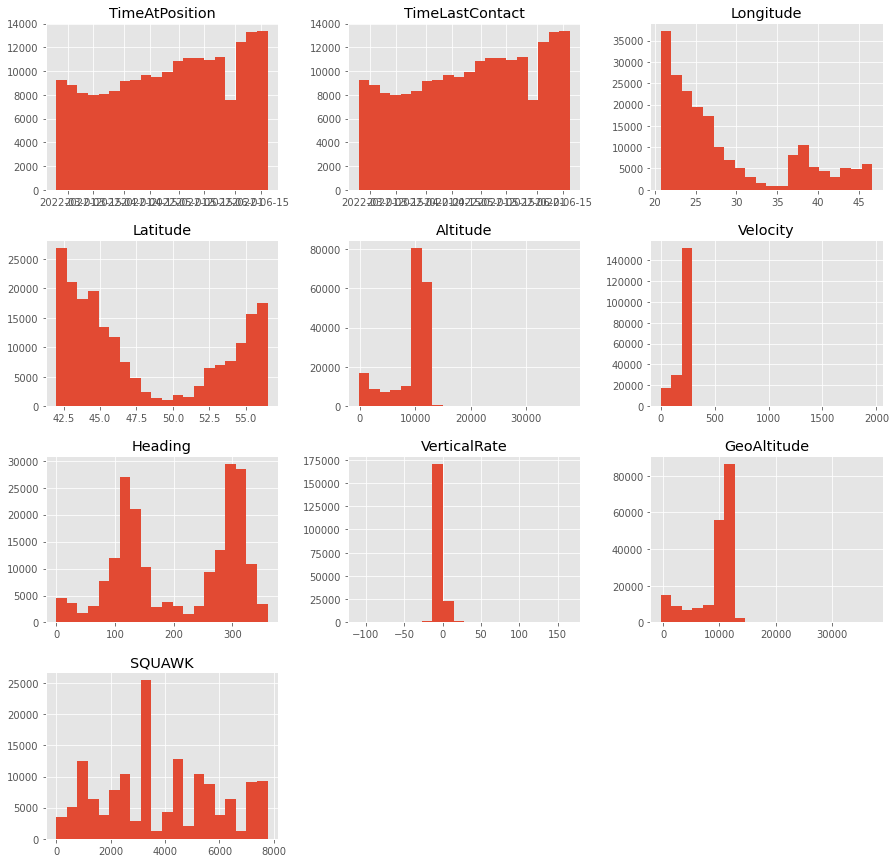

In [9]:
df.hist(bins=20,figsize=(15,15))
plt.show()

C:\Users\berid\AppData\Local\Temp\ipykernel_10288\2660631058.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(scatter3D,orientation='horizontal',pad=0.05,aspect=50)


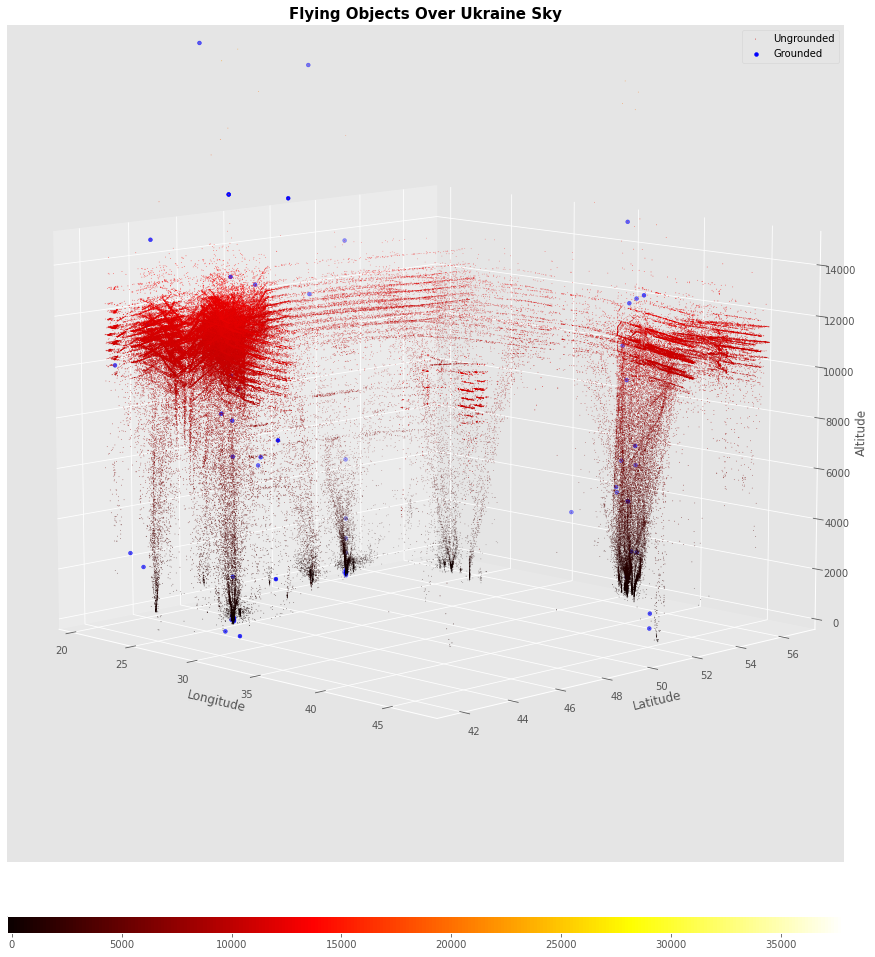

In [10]:
grounded=df[df['Grounded']]

fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(projection='3d')


scatter3D=ax.scatter(df['Longitude'],df['Latitude'],df['Altitude'],
                     c=df['Altitude'],cmap='hot',s=0.1,label='Ungrounded')

ax.scatter(grounded['Longitude'],grounded['Latitude'],grounded['Altitude'],
                    color='Blue',s=15,label='Grounded')

plt.colorbar(scatter3D,orientation='horizontal',pad=0.05,aspect=50)
plt.legend()

plt.title('Flying Objects Over Ukraine Sky',size=15,fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
ax.grid(True)
ax.set_zlim(-100,15000)
ax.view_init(elev=10, azim=-45)


plt.show()

In [11]:
df.corr()['Altitude'].sort_values(ascending=False)

Altitude        1.000000
GeoAltitude     0.990217
Velocity        0.869934
Heading         0.086914
SQUAWK          0.086063
VerticalRate    0.057557
SPI            -0.007618
Grounded       -0.012052
Longitude      -0.130528
Latitude       -0.409039
Name: Altitude, dtype: float64

In [12]:
df=df[['Altitude','Velocity','Longitude','Latitude']]

In [13]:
df=df.dropna()

In [14]:
X=df.drop('Altitude',axis=1)
Y=df['Altitude']

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [15]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

model=XGBRegressor()

params={ 'learning_rate':[0.02,0.05], 'max_depth':[2,3], 'n_estimators':[500,1000,2000]}

gs=GridSearchCV(model,params,n_jobs=1,verbose=10,cv=3,scoring='neg_mean_absolute_error')
gs.fit(xtrain,ytrain)

df_cv_scores=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')

In [16]:
#model=XGBRegressor(learning_rate=0.02,max_depth=5,n_estimators=2000)
model=XGBRegressor()
model.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [17]:
train_prediction=model.predict(xtrain)
test_prediction=model.predict(xtest)

In [18]:
r2_train=metrics.r2_score(train_prediction,ytrain)
r2_test=metrics.r2_score(test_prediction,ytest)

mae_train=metrics.mean_absolute_error(train_prediction,ytrain)
mae_test=metrics.mean_absolute_error(test_prediction,ytest)

rmse_train=metrics.mean_squared_error(train_prediction,ytrain,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,ytest,squared=False)

print('R2, MAE ,RMSE for train and test data are:')
print(r2_train,r2_test)
print(mae_train,mae_test)
print(rmse_train,rmse_test)

R2, MAE ,RMSE for train and test data are:
0.8962586223123875 0.876149989666509
727.8284981611383 766.6961503084952
1074.826215937417 1167.778289890912


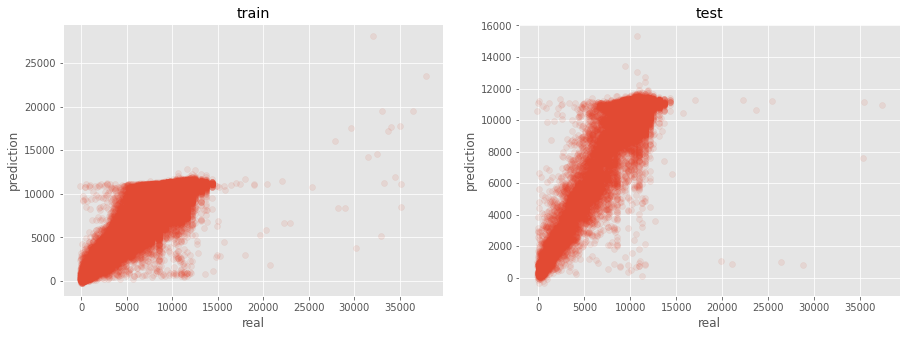

In [19]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(ytrain,train_prediction,alpha=0.1)
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')

ax2.scatter(ytest,test_prediction,alpha=0.1)
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()

In [ ]:
# Model strugles to predict accuratly when actual Altitude is above 12000
# Overall, model predicts the values very accurately, with smaller errors 

In [20]:
test=pd.concat([xtest,ytest],axis=1)
test['Prediction']=test_prediction
test=test.sort_values('Prediction')
test=test.reset_index(drop=True)
test['Example']=test.index
test

,Velocity,Longitude,Latitude,Altitude,Prediction,Example
0,4.02,22.0381,50.0350,99.06,-370.763458,0
1,37.14,24.4163,55.8584,548.64,-349.830322,1
2,45.07,28.5136,54.0440,487.68,-205.856201,2
3,20.07,22.0272,50.1101,0.00,-168.551208,3
4,18.65,26.2650,44.4763,175.26,-119.287033,4
...,...,...,...,...,...,...
39273,175.31,45.9519,56.3194,11582.40,12422.801758,39273
39274,193.16,21.0164,53.7850,11582.40,12742.236328,39274
39275,267.41,29.5100,43.3351,10675.62,13039.520508,39275
39276,269.89,41.3410,56.4687,9448.80,13421.128906,39276


<AxesSubplot:xlabel='Example'>

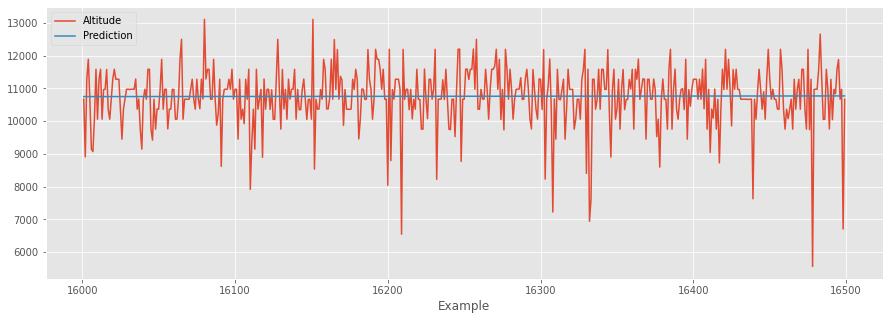

In [21]:
test.query('16000<Example<16500')\
.plot(figsize=(15,5),x='Example',y=['Altitude','Prediction'])

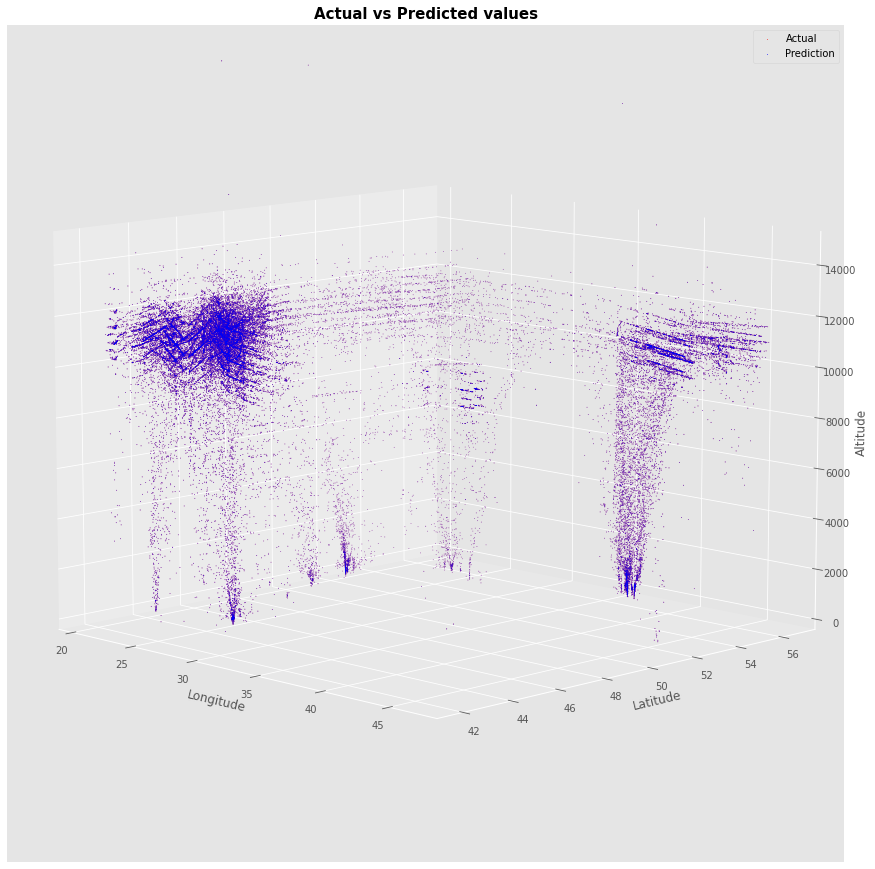

In [22]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(projection='3d')


scatter3D=ax.scatter(test['Longitude'],test['Latitude'],test['Altitude'],
                     color='Red',s=0.1,label='Actual')

ax.scatter(test['Longitude'],test['Latitude'],test['Altitude'],
                     color='Blue',s=0.11,label='Prediction')

#plt.colorbar(scatter3D,orientation='horizontal',pad=0.05,aspect=50)
plt.legend()

plt.title('Actual vs Predicted values',size=15,fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
ax.grid(True)
ax.set_zlim(-100,15000)
#ax.set_xlim(43,44)
#ax.set_ylim(53,53.25)
ax.view_init(elev=10, azim=-45)

plt.show()